#Пример распознавания изображений из набора данных cifar10. Идентификация вашего изображения
Пример распознавания изображений из набора данных cifar10, идентификация своего изображения

To run and edit the code, save a copy of this notebook to your drive (File-> Save a copy in Drive ...).

Чтобы запускать и редактировать код, сохраните копию этого ноутбука на свой диск (File->Save a copy in Drive...).

More details:
https://keras.io/api/datasets/

https://keras.io/api/datasets/cifar10/

https://www.tensorflow.org/datasets/catalog/cifar10?hl=en






##Набор данных CIFAR-10

Набор данных CIFAR-10 состоит из 60000 цветных изображений размером 32x32 в 10 классах, по 6000 изображений в каждом классе. Имеется 50000 обучающих изображений и 10000 тестовых изображений.

Набор данных разделен на пять обучающих пакетов и один тестовый пакет, каждый из которых содержит 10000 изображений. Тестовый пакет содержит ровно 1000 случайно выбранных изображений из каждого класса. Обучающие пакеты содержат оставшиеся изображения в случайном порядке, но некоторые обучающие пакеты могут содержать больше изображений из одного класса, чем из другого. В общей сложности обучающие пакеты содержат ровно 5000 изображений из каждого класса.



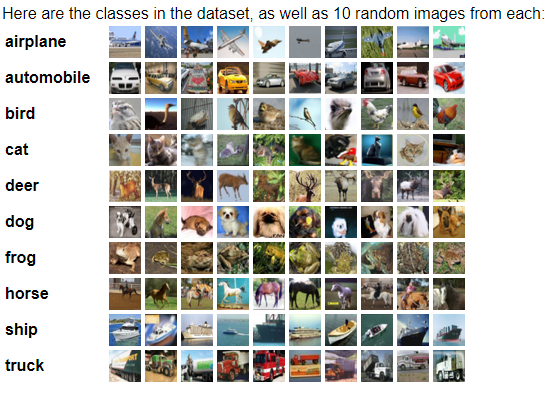

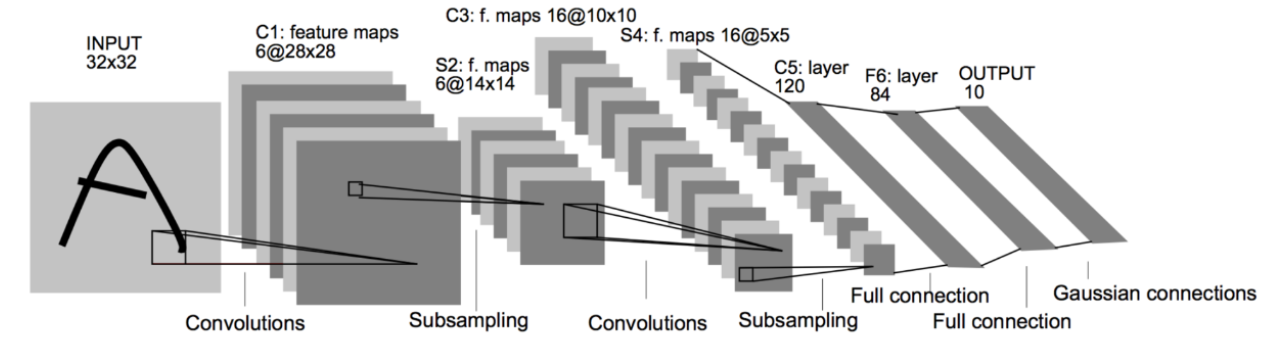

Классификация ImageNet с использованием глубоких сверточных нейронных сетей (2012)


http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf

https://habr.com/ru/company/mailru/blog/311706/

##Шаг №1.  Вспомогательные библиотеки и Tensorflow.Keras

1 шаг.  Загружаем необходимые ресурсы Tensorflow.Keras

Искусственная нейронная сеть создана с использованием ресурсов библиотеки Keras.

In [2]:
#from tensorflow.keras.datasets import mnist
#from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

### шаг 2. Импортируйте набор данных

In [3]:
# Import the dataset
#(x_train_init, y_train_init), (x_test_init, y_test_init) = fashion_mnist.load_data()
(x_train_init, y_train_init), (x_test_init, y_test_init) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


**Изучите полученные данные**

Посмотрим на данные

In [4]:
x_train_init.shape

(50000, 32, 32, 3)

In [5]:
len(x_train_init)

50000

In [6]:
x_train_init

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

**Data Normalization, feature standardization**

Нормализация данных

Измените эти значения в диапазоне от 0 до 1, прежде чем вводить их в модель нейронной сети. Для этого разделите значения на 255. Важно, чтобы обучающий набор и тестовый набор были предварительно обработаны одинаковым образом:

In [7]:
# Применяется к каждому элементу массива отдельно
x_train = x_train_init.astype('float32')
x_train = x_train_init / 255
x_test = x_test_init.astype('float32')
x_test = x_test_init / 255

In [8]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
len(x_test)

10000

#Шаг №3. Визуализация данных
3 шаг. Визуализация данных

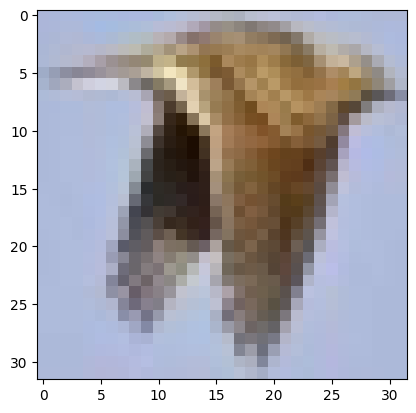

In [11]:
n = 123
plt.imshow(Image.fromarray(x_train_init[n]).convert('RGBA'))
plt.show()

In [12]:
# Список классов с названиями
#classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot'] # fashionMnist
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

[6] [9] [9] [4] [1] [1] [2] [7] [8] [3] 

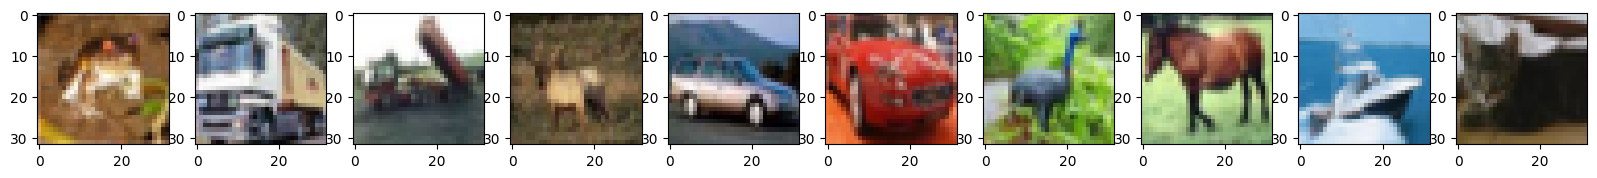

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train_init[i])
    print(y_train_init[i], end=' ')

##шаг 4. Предварительно обработайте данные

**Преобразование размерности данных в наборе**

Преобразуем форму массива в (1, 3072) (32 x 32 x 3)


Преобразуйте формат изображений из двумерного массива (размером 32 на 32 пикселя) в одномерный массив (размером 32 * 32 * 3 пикселей).

In [14]:
32*32*3

3072

In [15]:
#x_train = x_train.reshape(-1, 3072)

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
x_train = x_train.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

In [18]:
x_train.shape

(50000, 3072)

#Шаг №5. Преобразуйте надписи в один формат горячей кодировки

Каждая метка представляет собой целое число в диапазоне от 0 до 9:

In [19]:
y_test_init

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [20]:
print(y_test_init[n])

[2]


- Во многих приложениях удобно преобразовывать категориальные (нечисловые) признаки в числовые переменные.

- Например, цифра категориального признака со значением d в [0-9] может быть закодирована в двоичный вектор с 10 позициями, который всегда имеет значение 0, за исключением d-й позиции, где присутствует 1.
- - Этот тип представления называется **однократным кодированием (OHE)** и очень распространен в интеллектуальном анализе данных, когда обучающий алгоритм специализируется на работе с числовыми функциями.

Преобразуем метки в формат one hot encoding

In [21]:
y_train = utils.to_categorical(y_train_init, 10)
y_test = utils.to_categorical(y_test_init, 10)


**One hot encoding label**

**Правильный ответ в формате one hot encoding**

Например, для цифры 2: [0,0,1,0,0,0,0,0,0,0].



In [22]:
print(y_test[n])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


#Шаг №6. Создайте модель

Создаем нейронную сеть

**Создаем последовательную модель**

##Однослойная модель
**Модель нейронной сети с одним слоем**


Создаем слой, состоящий из 10 нейронов, в котором каждый нейрон связан со всеми входами = 3072 (32x32x3) в каждый нейрон.

- Исходным строительным блоком Keras является модель, а простейшая модель называется последовательной.

- Последовательная модель Keras представляет собой линейный конвейер (стек) слоев нейронных сетей.

- Сеть плотная, что означает, что каждый нейрон в слое связан со всеми нейронами, расположенными в предыдущем слое, и со всеми нейронами в следующем слое.

- Этот код определяет один слой с 10 нейронами и ожидает 3072 входных переменных (также известных как функции).
- Входной слой содержит нейрон, связанный с каждым пикселем изображения, в общей сложности 32 x 32 x 3 = 3072 нейрона, по одному на каждый пиксель в изображениях cifar10.

In [23]:
model_Dense_1 = Sequential()
model_Dense_1.add(Dense(10, input_dim=3072, activation='softmax'))

print(model_Dense_1.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │          30,730 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,730 (120.04 KB)

 Trainable params: 30,730 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
print('Trainable params:', (3072 + 1)*10) # 1 is a bias (b)

Trainable params: 30730


#Шаг №7. Скомпилируйте модель

Прежде чем модель будет готова к обучению, необходимо выполнить еще несколько настроек. Они добавляются на этапе компиляции модели:

- Функция потери данных — определяет, насколько точна модель во время обучения. Вы хотите минимизировать эту функцию, чтобы "направить" модель в нужном направлении.
- Оптимизатор — это способ обновления модели на основе данных, которые она видит, и ее функции потерь.
- Метрики — используются для мониторинга этапов обучения и тестирования. В следующем примере используется точность, доля изображений, которые правильно классифицированы.

In [25]:
# компелируем модель
model_Dense_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Компилируем модель, это значит задаем:

* функцию ошибки loss="categorical_crossentropy": определяет насколько сильно отличается значение, выданное нейронной сетью от правильного ответа
* оптимизатор: реализует оптимизационный алгоритм для обновления весовых коэффициентов и уменьшения ошибки
* метрику качества metrics=["accuracy"]: определяет долю правильных ответов

#Шаг №8. Обучите модель

Чтобы начать обучение, вызовите модель.метод fit — называется так потому, что он "подгоняет" модель к данным обучения.:

In [26]:
# обучаем модель
history = model_Dense_1.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2, verbose=2)

Epoch 1/5
313/313 - 4s - 11ms/step - accuracy: 0.3088 - loss: 1.9464 - val_accuracy: 0.3400 - val_loss: 1.8911
Epoch 2/5
313/313 - 3s - 10ms/step - accuracy: 0.3507 - loss: 1.8434 - val_accuracy: 0.3321 - val_loss: 1.9152
Epoch 3/5
313/313 - 1s - 4ms/step - accuracy: 0.3683 - loss: 1.8100 - val_accuracy: 0.3496 - val_loss: 1.8484
Epoch 4/5
313/313 - 1s - 3ms/step - accuracy: 0.3804 - loss: 1.7853 - val_accuracy: 0.3728 - val_loss: 1.7986
Epoch 5/5
313/313 - 2s - 5ms/step - accuracy: 0.3868 - loss: 1.7672 - val_accuracy: 0.3612 - val_loss: 1.8437


По мере обучения модели отображаются показатели потерь и точности.

Эта модель достигает точности около 0,4 (или 40%) по данным обучения.

Проверяем качество обучения на тестовом наборе данных.

Используем метод evaluate, указываем тестовый набор данных x_test и правильные ответы y_test

#Шаг №9. Оцените точность

Затем сравните, как работает модель в тестовом наборе данных:

In [27]:
scores = model_Dense_1.evaluate(x_test, y_test, verbose=0)
print('\033[91m', "A single layer model recognized", round(scores[1] * 100, 4), "% images correctly")

 A single layer model recognized 35.91 % images correctly


#Шаг #10. Улучшаем простую сетку в Keras с помощью скрытого слоя

- У нас есть базовая точность в 37% при обучении, 39% при валидации и 37% при тестировании. Это не лучшая отправная точка, но мы, безусловно, можем ее улучшить. Давайте посмотрим, как это сделать.

- Первое улучшение заключается в добавлении дополнительного слоя к нашей сети.
Итак, после входного слоя у нас есть первый плотный слой с N_HIDDEN нейронами и функцией активации relu.

- Этот дополнительный уровень считается скрытым, поскольку он напрямую не подключен ни к входу, ни к выходу.
- После первого скрытого слоя у нас есть выходной слой с 10 нейронами, каждый из которых активируется при распознавании соответствующего изображения.

Следующий код определяет эту новую сеть:

In [28]:
model_Dense_2 = Sequential()
model_Dense_2.add(Dense(100, input_dim=3072, activation='relu'))
model_Dense_2.add(Dense(10, activation='softmax'))

model_Dense_2.summary() # Print model info

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 100)                 │         307,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 308,310 (1.18 MB)

 Trainable params: 308,310 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
print('The first layer Trainable params: ', (3072 + 1)*100)
print('The second layer Trainable params: ', (100 + 1)*10)

The first layer Trainable params:  307300
The second layer Trainable params:  1010


**Скомпилировать и обучить модель**

In [30]:
# компелируем модель
model_Dense_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# обучаем модель
history = model_Dense_2.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2, verbose=2)

Epoch 1/5
313/313 - 4s - 14ms/step - accuracy: 0.2980 - loss: 1.9833 - val_accuracy: 0.3061 - val_loss: 1.9516
Epoch 2/5
313/313 - 3s - 9ms/step - accuracy: 0.3605 - loss: 1.8182 - val_accuracy: 0.3673 - val_loss: 1.8047
Epoch 3/5
313/313 - 1s - 3ms/step - accuracy: 0.3753 - loss: 1.7727 - val_accuracy: 0.3682 - val_loss: 1.7848
Epoch 4/5
313/313 - 1s - 4ms/step - accuracy: 0.3917 - loss: 1.7291 - val_accuracy: 0.3867 - val_loss: 1.7508
Epoch 5/5
313/313 - 1s - 3ms/step - accuracy: 0.3994 - loss: 1.7030 - val_accuracy: 0.3828 - val_loss: 1.7611


**Оценка точности**

In [31]:
# оценим точность распознавания на тестовых данных
scores = model_Dense_2.evaluate(x_test, y_test, verbose=0)
print('\033[91m', "A model with one hidden layer recognized", round(scores[1] * 100, 4), "% images correctly")

 A model with one hidden layer recognized 38.69 % images correctly


#Шаг №11. Улучшаем простую сетку в Keras с помощью двух скрытых слоев

- Второе усовершенствование заключается в добавлении дополнительного слоя к нашей сети.
- После первого скрытого слоя у нас есть второй скрытый слой, снова с нейронами N_HIDDEN.

In [32]:
model_Dense_3 = Sequential()
model_Dense_3.add(Dense(100, input_dim=3072, activation='relu'))
model_Dense_3.add(Dense(200, activation='relu'))
model_Dense_3.add(Dense(10, activation='softmax'))

model_Dense_3.summary() # Print model info

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │         307,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329,510 (1.26 MB)

 Trainable params: 329,510 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
print('The first layer Trainable params: ', (3072 + 1)*100)
print('The second layer Trainable params: ', (100 + 1)*200)
print('The third layer Trainable params: ', (200 + 1)*10)

The first layer Trainable params:  307300
The second layer Trainable params:  20200
The third layer Trainable params:  2010


**Скомпилировать и обучить модель**

In [34]:
# компелируем модель
model_Dense_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# обучаем модель
history = model_Dense_3.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2, verbose=2)

Epoch 1/5
313/313 - 5s - 15ms/step - accuracy: 0.3185 - loss: 1.8890 - val_accuracy: 0.3439 - val_loss: 1.8051
Epoch 2/5
313/313 - 2s - 7ms/step - accuracy: 0.3871 - loss: 1.7126 - val_accuracy: 0.3668 - val_loss: 1.7822
Epoch 3/5
313/313 - 1s - 4ms/step - accuracy: 0.4211 - loss: 1.6258 - val_accuracy: 0.4204 - val_loss: 1.6424
Epoch 4/5
313/313 - 2s - 6ms/step - accuracy: 0.4379 - loss: 1.5775 - val_accuracy: 0.4164 - val_loss: 1.6282
Epoch 5/5
313/313 - 1s - 3ms/step - accuracy: 0.4564 - loss: 1.5322 - val_accuracy: 0.4401 - val_loss: 1.5817


**Оценка точности**

In [35]:
# оценим точность распознавания на тестовых данных
scores = model_Dense_3.evaluate(x_test, y_test, verbose=0)
print('\033[91m', "A model with two hidden layer recognized", round(scores[1] * 100, 4), "% images correctly")

 A model with two hidden layer recognized 45.45 % images correctly


#Шаг №12. Улучшение простой сетки в Keras с помощью сверточных слоев

**Сверточная модель**

In [36]:
x_train_cnn = x_train.reshape(x_train.shape[0], 32, 32, 3)
input_shape_cnn = (32, 32, 3)

Дополнение к CNN от Эндрю Нг

https://www.youtube.com/watch?v=smHa2442Ah4


**ПОНИМАНИЕ ЭФФЕКТОВ ГРАНИЦ И ЗАПОЛНЕНИЯ полей**

Ф. Чолле, ГЛАВА 5 "Глубокое обучение компьютерному зрению", стр.125

Эффекты границ, которые можно устранить, заполнив входную карту объектов.

In [45]:
model_CNN = Sequential()
model_CNN.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape_cnn))
model_CNN.add(Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Flatten())
model_CNN.add(Dense(512, activation='relu'))
model_CNN.add(Dense(10, activation='softmax'))
model_CNN.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      11,076,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,174,474 (42.63 MB)

 Trainable params: 11,174,474 (42.63 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
print("model_CNN.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape_cnn))")
print("Trainable params: ", 32*(3*3*3+1))
print("\nmodel_CNN.add(Conv2D(64, (3,3), activation='relu')")
print("Trainable params: ", 64*(3*3*32+1))
print("\nmodel_CNN.add(Conv2D(128, (3, 3), activation='relu'))")
print("Trainable params: ", 128*(3*3*64+1))
print("\nmodel_CNN.add(MaxPooling2D(pool_size=(2, 2))) - > max_pooling2d (MaxPooling2D) (None, 13, 13, 128)")
print("Trainable params: 0")
print("\nmodel_CNN.add(Flatten())")
print('''\nThe final feature map has 13 × 13 × 128 = 21632 total coefficients per sample.
This is huge. If you were to flatten it to stick a Dense layer of size 512 on top,
that layer would have 11.07 million parameters.''')
print("\nmodel_CNN.add(Dense(512, activation='relu'))")
print("Trainable params: ", 21632*512)
print("\nmodel_CNN.add(Dense(10, activation='softmax')")
print("Trainable params: ", (512+1)*10)

model_CNN.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape_cnn))
Trainable params:  896

model_CNN.add(Conv2D(64, (3,3), activation='relu')
Trainable params:  18496

model_CNN.add(Conv2D(128, (3, 3), activation='relu'))
Trainable params:  73856

model_CNN.add(MaxPooling2D(pool_size=(2, 2))) - > max_pooling2d (MaxPooling2D) (None, 13, 13, 128)
Trainable params: 0

model_CNN.add(Flatten())

The final feature map has 13 × 13 × 128 = 21632 total coefficients per sample.
This is huge. If you were to flatten it to stick a Dense layer of size 512 on top,
that layer would have 11.07 million parameters.

model_CNN.add(Dense(512, activation='relu'))
Trainable params:  11075584

model_CNN.add(Dense(10, activation='softmax')
Trainable params:  5130


##Callback

In [39]:
from tensorflow.python.keras.callbacks import ModelCheckpoint # EarlyStopping, ReduceLROnPlateau

In [47]:
modelCheckpoint = ModelCheckpoint(
    "model-cnn.h5",
    monitor='val_accuracy',
    verbose=2,
    save_best_only=True
)

In [48]:
callbacks_list = [modelCheckpoint] # earlystop, learning_rate_reduction

##Скомпилируйте и обучите модель

In [49]:
# компелируем модель
model_CNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# обучаем модель
history = model_CNN.fit(
    x_train_cnn,
    y_train,
    batch_size=128,
    callbacks=callbacks_list,
    epochs=20,
    validation_split=0.2,
    verbose=2
)

Epoch 1/20

Epoch 1: val_accuracy improved from -inf to 0.56050, saving model to model-cnn.h5


313/313 - 12s - 37ms/step - accuracy: 0.4719 - loss: 1.4649 - val_accuracy: 0.5605 - val_loss: 1.2565
Epoch 2/20

Epoch 2: val_accuracy improved from 0.56050 to 0.64220, saving model to model-cnn.h5


313/313 - 18s - 56ms/step - accuracy: 0.6484 - loss: 0.9975 - val_accuracy: 0.6422 - val_loss: 1.0241
Epoch 3/20

Epoch 3: val_accuracy improved from 0.64220 to 0.68950, saving model to model-cnn.h5


313/313 - 10s - 32ms/step - accuracy: 0.7357 - loss: 0.7595 - val_accuracy: 0.6895 - val_loss: 0.8919
Epoch 4/20

Epoch 4: val_accuracy improved from 0.68950 to 0.69850, saving model to model-cnn.h5


313/313 - 11s - 34ms/step - accuracy: 0.8134 - loss: 0.5443 - val_accuracy: 0.6985 - val_loss: 0.9000
Epoch 5/20

Epoch 5: val_accuracy improved from 0.69850 to 0.70300, saving model to model-cnn.h5


313/313 - 10s - 32ms/step - accuracy: 0.8877 - loss: 0.3262 - val_accuracy: 0.7030 - val_loss: 1.0317
Epoch 6/20

Epoch 6: val_accuracy did not improve from 0.70300
313/313 - 7s - 22ms/step - accuracy: 0.9462 - loss: 0.1629 - val_accuracy: 0.6878 - val_loss: 1.3308
Epoch 7/20

Epoch 7: val_accuracy did not improve from 0.70300
313/313 - 10s - 33ms/step - accuracy: 0.9734 - loss: 0.0845 - val_accuracy: 0.6903 - val_loss: 1.5743
Epoch 8/20

Epoch 8: val_accuracy did not improve from 0.70300
313/313 - 10s - 32ms/step - accuracy: 0.9858 - loss: 0.0469 - val_accuracy: 0.6941 - val_loss: 1.6892
Epoch 9/20

Epoch 9: val_accuracy did not improve from 0.70300
313/313 - 7s - 22ms/step - accuracy: 0.9860 - loss: 0.0449 - val_accuracy: 0.6935 - val_loss: 1.7229
Epoch 10/20

Epoch 10: val_accuracy did not improve from 0.70300
313/313 - 7s - 22ms/step - accuracy: 0.9840 - loss: 0.0484 - val_accuracy: 0.6949 - val_loss: 1.8807
Epoch 11/20

Epoch 11: val_accuracy did not improve from 0.70300
313/313 -

**Training Visualization**

**Визуализация качества обучения**



Состав словаря History

In [50]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Печатаем значения ошибки на обучающем наборе данных

In [52]:
history.history['loss']

[1.4649021625518799,
 0.9975224733352661,
 0.759480893611908,
 0.5442668199539185,
 0.3262498676776886,
 0.1628655344247818,
 0.08445722609758377,
 0.04691382497549057,
 0.04487602412700653,
 0.04837869107723236,
 0.04253134876489639,
 0.04361043870449066,
 0.03327047452330589,
 0.03810401260852814,
 0.03498416766524315,
 0.037620045244693756,
 0.027282660827040672,
 0.02228032611310482,
 0.03279050439596176,
 0.023854387924075127]

In [53]:
min(history.history['loss'])

0.02228032611310482

Печатаем долю правильных ответов наобучающем наборе данных




In [54]:
history.history['accuracy']

[0.47189998626708984,
 0.6484249830245972,
 0.7356500029563904,
 0.8133749961853027,
 0.8877249956130981,
 0.9461749792098999,
 0.9733750224113464,
 0.9858250021934509,
 0.9860249757766724,
 0.9839749932289124,
 0.9851999878883362,
 0.9850999712944031,
 0.9890249967575073,
 0.9868249893188477,
 0.9889500141143799,
 0.987375020980835,
 0.9908499717712402,
 0.9921749830245972,
 0.989549994468689,
 0.9922000169754028]

In [55]:
max(history.history['accuracy'])

0.9922000169754028

Строим график

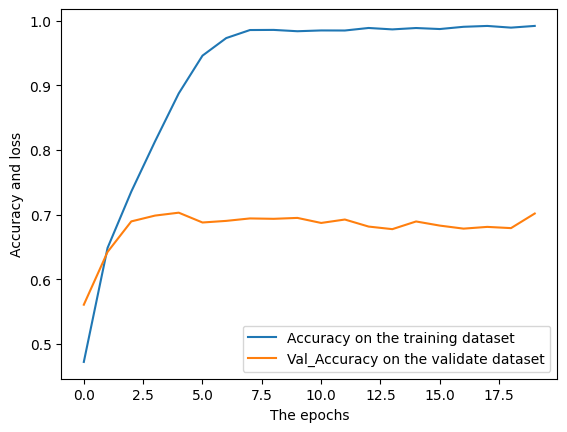

In [56]:
plt.plot(history.history['accuracy'],
         label='Accuracy on the training dataset')
plt.plot(history.history['val_accuracy'],
         label='Val_Accuracy on the validate dataset')
plt.xlabel('The epochs')
plt.ylabel('Accuracy and loss')
plt.legend()
plt.show()

In [57]:
x_test_cnn = x_test.reshape(x_test.shape[0], 32, 32, 3)

In [58]:
x_test_cnn.shape

(10000, 32, 32, 3)

**Оценка точности**

In [59]:
# оценим точность распознавания на тестовых данных
scores = model_CNN.evaluate(x_test_cnn, y_test, verbose=0)
print('\033[91m', "The convolutional model recognized", round(scores[1] * 100, 4), "% images correctly")

 The convolutional model recognized 68.22 % images correctly


**Делать прогнозы**

Модель предсказала метку для каждого изображения в тестовом наборе.

In [60]:
predictions = model_CNN.predict(x_test_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


Давайте взглянем на первое предсказание:

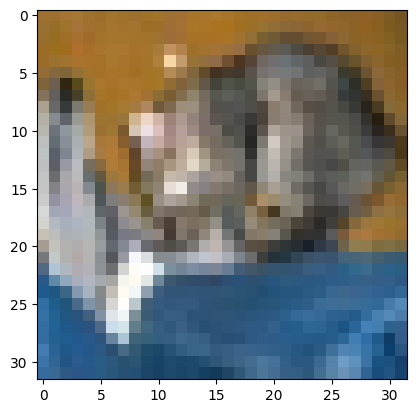

In [61]:
# Меняйте значение n чтобы просмотреть результаты распознавания других изображений
n = 0
plt.imshow(x_test_cnn[n].reshape(32, 32, 3))
plt.show()

In [62]:
print(predictions[n])

[5.6639459e-13 4.1752807e-13 2.5351420e-13 9.9998903e-01 4.6385068e-10
 1.6925607e-06 9.2485916e-06 5.4012498e-12 1.7401699e-14 1.3420122e-09]


Прогноз представляет собой массив из 10 чисел.

Они представляют собой "уверенность" модели в том, что изображение соответствует каждому из 10 различных предметов одежды.

Вы можете увидеть, какой ярлык имеет наибольшее значение достоверности:

In [63]:
np.argmax(predictions[n])

3

In [64]:
classes[np.argmax(predictions[n])]

'cat'

#Шаг №13. Используйте обученную модель
**Загружаем свою картинку**


Наконец, используйте обученную модель, чтобы сделать прогноз относительно одного изображения.

In [67]:
from google.colab import files
uploaded = files.upload()

Saving frog.jpg to frog.jpg


In [68]:
# проверим наличие файла
!ls

frog.jpg  model-cnn.h5	sample_data


Преобразуем в формат 32 на 32


In [69]:
img_path = 'frog.jpg'
img = image.load_img(img_path, target_size=(32, 32)) # color_mode = "grayscale"

Покажем картинку


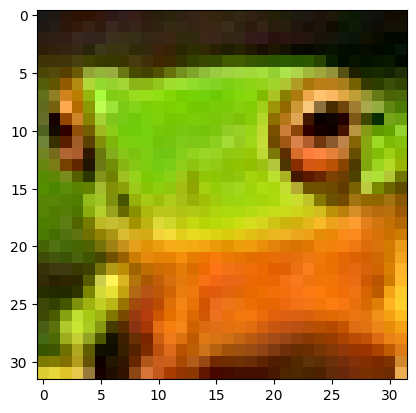

In [70]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [71]:
#Преобразуем картинку в массив
x=image.img_to_array(img)
#Меняем форму массива в плоский вектор
x=x.reshape(1, 32, 32, 3)
# Инвертируем изображение
#x=255-x
# Нормализуем изображение
x/=255

**A prediction result**


**Результат распознавания**

In [72]:
prediction = model_CNN.predict(x)
print(prediction)
print('\033[91m', "Perhaps it", classes[np.argmax(prediction)]) # ANSI escape code (color management), finding the maximum in the sequence 'prediction'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[3.74919318e-06 1.61259322e-05 1.22698575e-05 2.21957225e-06
  1.38924923e-02 4.11652827e-08 9.86073136e-01 6.85292170e-11
  5.81219439e-15 2.73689915e-09]]
 Perhaps it frog


И модель предсказывает метку, как и ожидалось.

#Шаг №14. Сохраните модель.

**Сохраняем обученную сеть в файл**

**Сохранение всей модели в целом (конфигурация + вес)**

In [73]:
model_CNN.save("my_best_model.h5")

In [74]:
!ls

frog.jpg  model-cnn.h5	my_best_model.h5  sample_data


In [75]:
# загрузим сохраненную модель
from keras.models import load_model
model_save = load_model("my_best_model.h5")

In [76]:
#посмотрим на архитектуру загруженной модели
model_save.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      11,076,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,174,476 (42.63 MB)

 Trainable params: 11,174,474 (42.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**Экономия только на весе**

In [78]:
model_CNN.save_weights('my_model_weights.h5')

Какие у меня есть варианты сохранения моделей?

https://keras.io/getting_started/faq/#what-are-my-options-for-saving-models

#Шаг №15. Повысьте точность моделей

Как это можно сделать?

**Рекомендации:**

- Полезно понаблюдать, как повышается точность на обучающих и тестовых наборах при увеличении количества эпох.
- Вторым улучшением является добавление дополнительного слоя в нашу сеть.
- Измените количество нейронов (10, 50) в плотных слоях.
- Измените количество фильтров (8, 16, 32, 64, 128, 256) в сверточных слоях.
- Используйте выпадающие слои. Обратите внимание, что часто наблюдалось, что сети со случайным выпадением во внутренних скрытых слоях могут лучше обобщать на невидимых примерах, содержащихся в тестовых наборах.
- - Используйте слои пакетной нормализации
- Используйте слои максимального объединения в сверточных слоях.

**Следите за обновлением модели!**

- Подготовьте отчет о своем исследовании.

*******************************************************************************************

### Задание
Добейтесь улучшения точности модели, используя следующие подходы:
- изменить число нейронов (10, 50);
- добавить один дополнительный слой;
- увеличить число эпох (контролируйте изменение точности);
- изменить параметр batch_size (32, 64).

Сделайте выводы.

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [80]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

input_shape_cnn = x_train.shape[1:]

In [81]:
model_CNN = Sequential()
model_CNN.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape_cnn))
model_CNN.add(BatchNormalization())
model_CNN.add(Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(256, (3, 3), activation='relu'))  # Additional layer
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Flatten())
model_CNN.add(Dense(512, activation='relu'))  # Changed number of neurons
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(10, activation='softmax'))

In [83]:
model_CNN.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 920,266 (3.51 MB)

 Trainable params: 919,306 (3.51 MB)

 Non-trainable params: 960 (3.75 KB)

In [84]:
model_CNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

modelCheckpoint = ModelCheckpoint(
    "model-cnn.h5",
    monitor='val_accuracy',
    verbose=2,
    save_best_only=True
)

callbacks_list = [modelCheckpoint]

history = model_CNN.fit(
    x_train,
    y_train,
    batch_size=64,  # Changed batch size
    callbacks=callbacks_list,
    epochs=50,  # Increased number of epochs
    validation_split=0.2,
    verbose=2
)

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.41600, saving model to model-cnn.h5


625/625 - 27s - 43ms/step - accuracy: 0.4296 - loss: 1.6191 - val_accuracy: 0.4160 - val_loss: 1.7069
Epoch 2/50

Epoch 2: val_accuracy improved from 0.41600 to 0.62720, saving model to model-cnn.h5


625/625 - 5s - 9ms/step - accuracy: 0.5709 - loss: 1.2085 - val_accuracy: 0.6272 - val_loss: 1.0698
Epoch 3/50

Epoch 3: val_accuracy improved from 0.62720 to 0.69400, saving model to model-cnn.h5


625/625 - 6s - 9ms/step - accuracy: 0.6364 - loss: 1.0362 - val_accuracy: 0.6940 - val_loss: 0.8867
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.69400
625/625 - 10s - 16ms/step - accuracy: 0.6717 - loss: 0.9267 - val_accuracy: 0.6857 - val_loss: 0.9426
Epoch 5/50

Epoch 5: val_accuracy improved from 0.69400 to 0.72550, saving model to model-cnn.h5


625/625 - 5s - 8ms/step - accuracy: 0.7028 - loss: 0.8500 - val_accuracy: 0.7255 - val_loss: 0.8073
Epoch 6/50

Epoch 6: val_accuracy improved from 0.72550 to 0.74360, saving model to model-cnn.h5


625/625 - 10s - 17ms/step - accuracy: 0.7212 - loss: 0.7988 - val_accuracy: 0.7436 - val_loss: 0.7426
Epoch 7/50

Epoch 7: val_accuracy improved from 0.74360 to 0.75470, saving model to model-cnn.h5


625/625 - 5s - 8ms/step - accuracy: 0.7436 - loss: 0.7398 - val_accuracy: 0.7547 - val_loss: 0.7137
Epoch 8/50

Epoch 8: val_accuracy did not improve from 0.75470
625/625 - 10s - 16ms/step - accuracy: 0.7573 - loss: 0.6953 - val_accuracy: 0.7413 - val_loss: 0.7857
Epoch 9/50

Epoch 9: val_accuracy improved from 0.75470 to 0.77380, saving model to model-cnn.h5


625/625 - 5s - 8ms/step - accuracy: 0.7688 - loss: 0.6683 - val_accuracy: 0.7738 - val_loss: 0.6605
Epoch 10/50

Epoch 10: val_accuracy did not improve from 0.77380
625/625 - 5s - 8ms/step - accuracy: 0.7809 - loss: 0.6298 - val_accuracy: 0.7630 - val_loss: 0.6990
Epoch 11/50

Epoch 11: val_accuracy improved from 0.77380 to 0.79270, saving model to model-cnn.h5


625/625 - 6s - 9ms/step - accuracy: 0.7895 - loss: 0.6049 - val_accuracy: 0.7927 - val_loss: 0.6303
Epoch 12/50

Epoch 12: val_accuracy did not improve from 0.79270
625/625 - 5s - 9ms/step - accuracy: 0.7982 - loss: 0.5798 - val_accuracy: 0.7804 - val_loss: 0.6618
Epoch 13/50

Epoch 13: val_accuracy improved from 0.79270 to 0.79700, saving model to model-cnn.h5


625/625 - 11s - 17ms/step - accuracy: 0.8055 - loss: 0.5594 - val_accuracy: 0.7970 - val_loss: 0.6140
Epoch 14/50

Epoch 14: val_accuracy improved from 0.79700 to 0.80110, saving model to model-cnn.h5


625/625 - 5s - 8ms/step - accuracy: 0.8154 - loss: 0.5316 - val_accuracy: 0.8011 - val_loss: 0.6166
Epoch 15/50

Epoch 15: val_accuracy did not improve from 0.80110
625/625 - 5s - 9ms/step - accuracy: 0.8218 - loss: 0.5089 - val_accuracy: 0.7895 - val_loss: 0.6667
Epoch 16/50

Epoch 16: val_accuracy did not improve from 0.80110
625/625 - 11s - 17ms/step - accuracy: 0.8258 - loss: 0.4966 - val_accuracy: 0.7680 - val_loss: 0.7667
Epoch 17/50

Epoch 17: val_accuracy did not improve from 0.80110
625/625 - 5s - 8ms/step - accuracy: 0.8321 - loss: 0.4809 - val_accuracy: 0.7880 - val_loss: 0.6780
Epoch 18/50

Epoch 18: val_accuracy did not improve from 0.80110
625/625 - 10s - 17ms/step - accuracy: 0.8391 - loss: 0.4705 - val_accuracy: 0.7744 - val_loss: 0.7002
Epoch 19/50

Epoch 19: val_accuracy did not improve from 0.80110
625/625 - 5s - 8ms/step - accuracy: 0.8463 - loss: 0.4465 - val_accuracy: 0.7586 - val_loss: 0.7875
Epoch 20/50

Epoch 20: val_accuracy improved from 0.80110 to 0.81550, s

625/625 - 6s - 9ms/step - accuracy: 0.8487 - loss: 0.4366 - val_accuracy: 0.8155 - val_loss: 0.5708
Epoch 21/50

Epoch 21: val_accuracy did not improve from 0.81550
625/625 - 10s - 17ms/step - accuracy: 0.8526 - loss: 0.4272 - val_accuracy: 0.8104 - val_loss: 0.6064
Epoch 22/50

Epoch 22: val_accuracy improved from 0.81550 to 0.81880, saving model to model-cnn.h5


625/625 - 5s - 8ms/step - accuracy: 0.8580 - loss: 0.4084 - val_accuracy: 0.8188 - val_loss: 0.5924
Epoch 23/50

Epoch 23: val_accuracy did not improve from 0.81880
625/625 - 5s - 8ms/step - accuracy: 0.8615 - loss: 0.4016 - val_accuracy: 0.8180 - val_loss: 0.5981
Epoch 24/50

Epoch 24: val_accuracy did not improve from 0.81880
625/625 - 5s - 8ms/step - accuracy: 0.8655 - loss: 0.3899 - val_accuracy: 0.8046 - val_loss: 0.6521
Epoch 25/50

Epoch 25: val_accuracy did not improve from 0.81880
625/625 - 5s - 9ms/step - accuracy: 0.8641 - loss: 0.3895 - val_accuracy: 0.8108 - val_loss: 0.6287
Epoch 26/50

Epoch 26: val_accuracy did not improve from 0.81880
625/625 - 10s - 16ms/step - accuracy: 0.8719 - loss: 0.3696 - val_accuracy: 0.8107 - val_loss: 0.6364
Epoch 27/50

Epoch 27: val_accuracy improved from 0.81880 to 0.82210, saving model to model-cnn.h5


625/625 - 10s - 16ms/step - accuracy: 0.8748 - loss: 0.3634 - val_accuracy: 0.8221 - val_loss: 0.6134
Epoch 28/50

Epoch 28: val_accuracy did not improve from 0.82210
625/625 - 5s - 9ms/step - accuracy: 0.8782 - loss: 0.3495 - val_accuracy: 0.8158 - val_loss: 0.6534
Epoch 29/50

Epoch 29: val_accuracy did not improve from 0.82210
625/625 - 5s - 8ms/step - accuracy: 0.8791 - loss: 0.3475 - val_accuracy: 0.8168 - val_loss: 0.6319
Epoch 30/50

Epoch 30: val_accuracy did not improve from 0.82210
625/625 - 5s - 8ms/step - accuracy: 0.8832 - loss: 0.3390 - val_accuracy: 0.8159 - val_loss: 0.6402
Epoch 31/50

Epoch 31: val_accuracy improved from 0.82210 to 0.83140, saving model to model-cnn.h5


625/625 - 5s - 8ms/step - accuracy: 0.8819 - loss: 0.3383 - val_accuracy: 0.8314 - val_loss: 0.5905
Epoch 32/50

Epoch 32: val_accuracy improved from 0.83140 to 0.83440, saving model to model-cnn.h5


625/625 - 11s - 17ms/step - accuracy: 0.8888 - loss: 0.3246 - val_accuracy: 0.8344 - val_loss: 0.5559
Epoch 33/50

Epoch 33: val_accuracy did not improve from 0.83440
625/625 - 5s - 8ms/step - accuracy: 0.8909 - loss: 0.3122 - val_accuracy: 0.8098 - val_loss: 0.6933
Epoch 34/50

Epoch 34: val_accuracy did not improve from 0.83440
625/625 - 5s - 8ms/step - accuracy: 0.8898 - loss: 0.3189 - val_accuracy: 0.8130 - val_loss: 0.6851
Epoch 35/50

Epoch 35: val_accuracy did not improve from 0.83440
625/625 - 10s - 17ms/step - accuracy: 0.8946 - loss: 0.3014 - val_accuracy: 0.8309 - val_loss: 0.6319
Epoch 36/50

Epoch 36: val_accuracy did not improve from 0.83440
625/625 - 5s - 8ms/step - accuracy: 0.8976 - loss: 0.2998 - val_accuracy: 0.8244 - val_loss: 0.6342
Epoch 37/50

Epoch 37: val_accuracy did not improve from 0.83440
625/625 - 5s - 8ms/step - accuracy: 0.8978 - loss: 0.2954 - val_accuracy: 0.8305 - val_loss: 0.6185
Epoch 38/50

Epoch 38: val_accuracy did not improve from 0.83440
625/62

625/625 - 10s - 16ms/step - accuracy: 0.9044 - loss: 0.2783 - val_accuracy: 0.8428 - val_loss: 0.5853
Epoch 41/50

Epoch 41: val_accuracy did not improve from 0.84280
625/625 - 10s - 16ms/step - accuracy: 0.9061 - loss: 0.2745 - val_accuracy: 0.8271 - val_loss: 0.6409
Epoch 42/50

Epoch 42: val_accuracy did not improve from 0.84280
625/625 - 5s - 8ms/step - accuracy: 0.9063 - loss: 0.2711 - val_accuracy: 0.8296 - val_loss: 0.6108
Epoch 43/50

Epoch 43: val_accuracy did not improve from 0.84280
625/625 - 10s - 16ms/step - accuracy: 0.9103 - loss: 0.2629 - val_accuracy: 0.8389 - val_loss: 0.5753
Epoch 44/50

Epoch 44: val_accuracy did not improve from 0.84280
625/625 - 5s - 9ms/step - accuracy: 0.9089 - loss: 0.2647 - val_accuracy: 0.8306 - val_loss: 0.6174
Epoch 45/50

Epoch 45: val_accuracy did not improve from 0.84280
625/625 - 5s - 8ms/step - accuracy: 0.9089 - loss: 0.2647 - val_accuracy: 0.8365 - val_loss: 0.6007
Epoch 46/50

Epoch 46: val_accuracy did not improve from 0.84280
625/

625/625 - 6s - 9ms/step - accuracy: 0.9157 - loss: 0.2472 - val_accuracy: 0.8440 - val_loss: 0.6154
Epoch 49/50

Epoch 49: val_accuracy did not improve from 0.84400
625/625 - 5s - 8ms/step - accuracy: 0.9174 - loss: 0.2450 - val_accuracy: 0.8355 - val_loss: 0.6324
Epoch 50/50

Epoch 50: val_accuracy did not improve from 0.84400
625/625 - 5s - 9ms/step - accuracy: 0.9189 - loss: 0.2393 - val_accuracy: 0.8409 - val_loss: 0.6107


In [85]:
test_loss, test_accuracy = model_CNN.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy}")

313/313 - 1s - 4ms/step - accuracy: 0.8349 - loss: 0.6485
Test accuracy: 0.8349000215530396


Наблюдения:
- Количество нейронов: Увеличение числа нейронов в плотном слое помогло модели изучить более сложные паттерны, но это также приводит к переобучению, если не использовать должным образом такие методы, как отсев.

- Дополнительный слой: Добавление еще одного сверточного слоя помоглоь модели отобразить на изображениях более сложные элементы.

- Эпохи: Увеличение количества эпох позволяет модели обучаться дольше, что потенциально повышает точность, но требует мониторинга для предотвращения переобучения.

- Размер пакета: Изменение размера пакета может повлиять на стабильность и скорость сходимости. Меньший размер пакета может обеспечить более точную оценку градиента, но может привести к появлению большего количества помех.